In [7]:
!pip install tensorflow-macos==2.16.2 tensorflow-metal==1.2.0 tf-keras==2.16.0 opencv-python mediapipe scikit-learn matplotlib

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import time
import mediapipe as mp

In [9]:
mp_holistic=mp.solutions.holistic #Holistic Model
mp_drawing=mp.solutions.drawing_utils #Drawing Utilities

In [10]:
def mediapipe_detection(image,model):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)  #color coversion bgr to rgb
    image.flags.writeable=False                  #Image is no linger writeable
    results=model.process(image)                 #Make preductions
    image.flags.writeable=True                   #Image is now writeable 
    image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)  #color coversion rgb to bgr
    return image,results

In [14]:
def draw_landmarks(image,results):
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_TESSELATION) #Draw face connections
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS) #draw pose connections
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS) #draw left hand connections
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS) #draw right hand connections

In [15]:
def draw_styled_landmarks(image,results):
     #Draw face connections
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1),
                               mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1))
    #draw pose connections
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10),thickness=2,circle_radius=4),
                               mp_drawing.DrawingSpec(color=(80,44,121),thickness=2,circle_radius=2)) 
    #draw left hand connections
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76),thickness=2,circle_radius=4),
                               mp_drawing.DrawingSpec(color=(121,44,250),thickness=2,circle_radius=2))
    #draw right hand connections
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66),thickness=2,circle_radius=4),
                               mp_drawing.DrawingSpec(color=(245,66,230),thickness=2,circle_radius=2))

In [16]:
#keypoints using MP holistic
cap=cv2.VideoCapture(0)
#Set ModelPipeline
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        #read frame
        ret,frame=cap.read()
        image,results = mediapipe_detection(frame,holistic)
        print(results)

        #Draw LandMarks
        draw_styled_landmarks(image,results)
        
        #show to screen
        cv2.imshow('OpenCV Feed',image)
        #brake gracefully
        if cv2.waitKey(10) & 0xFF==ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1744280326.226687 2903453 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M1
W0000 00:00:1744280326.301271 2909457 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744280326.314054 2909456 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744280326.315359 2909459 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744280326.315488 2909462 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744280326.316689 2909456 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support 

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


2025-04-10 15:48:47.083 python[75695:2903453] +[IMKClient subclass]: chose IMKClient_Modern
2025-04-10 15:48:47.083 python[75695:2903453] +[IMKInputSession subclass]: chose IMKInputSession_Modern


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [17]:
draw_landmarks(frame,results)

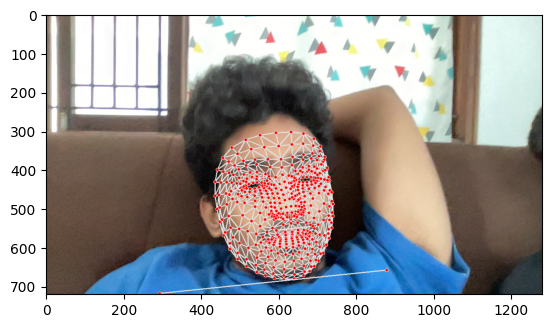

In [18]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [19]:
len(results.pose_landmarks.landmark)

33

In [20]:
pose=[]
for res in results.pose_landmarks.landmark:
    test=np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)

In [21]:
pose

[array([ 0.49672112,  0.65555406, -0.75297993,  0.99841136]),
 array([ 0.51274693,  0.56041723, -0.70605683,  0.99582291]),
 array([ 0.53038943,  0.55577099, -0.70586485,  0.99511075]),
 array([ 0.5468502 ,  0.55242604, -0.70583594,  0.99442112]),
 array([ 0.44951072,  0.57916832, -0.72585076,  0.99767578]),
 array([ 0.42455667,  0.58913016, -0.72495162,  0.99790114]),
 array([ 0.40351829,  0.59967703, -0.72546703,  0.99847561]),
 array([ 0.56955111,  0.58281237, -0.34327537,  0.99499959]),
 array([ 0.3698464 ,  0.64535809, -0.39904326,  0.99894482]),
 array([ 0.53825969,  0.75828475, -0.61012095,  0.99623132]),
 array([ 0.46426424,  0.77262038, -0.62753445,  0.99788898]),
 array([ 0.68692017,  0.91465133, -0.08635662,  0.97726947]),
 array([ 0.22912654,  0.99742186, -0.24235547,  0.99504858]),
 array([0.84078008, 1.0626651 , 0.16870186, 0.24353242]),
 array([ 0.13107583,  1.49687088, -0.16965994,  0.49674907]),
 array([0.74945819, 1.29387736, 0.35605758, 0.03706575]),
 array([ 0.17344

In [22]:
pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*3)
face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [23]:
len(results.face_landmarks.landmark)*3

1404

In [24]:
face

array([ 0.49626166,  0.77793753, -0.02899334, ...,  0.54730755,
        0.57390457,  0.02880226])

In [25]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
lh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [27]:
def extract_keypoints(results):
    pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

    return np.concatenate([pose,face,lh,rh])

In [28]:
result_test=extract_keypoints(results).shape

In [29]:
np.save('0',result_test)

In [30]:
np.load('0.npy')

array([1662])

In [31]:
#SET UP FOLLDERS FOR COLLECTION

#path for exported data ,numpy arrays
DATA_PATH=os.path.join('MP_Data')

#Actions that we need to try
actions=np.array(['Hello','Thankyou','iloveyou'])

#Thirty videos worth of data
no_sequences=30

#Videos are goint to be 30 frames in length
sequence_length=30

In [32]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass
        

In [33]:
#collect keypoints for training and testing
#keypoints using MP holistic
cap=cv2.VideoCapture(0)
#Set ModelPipeline
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    #Loop through actions
    for action in actions:
        #Loop through sequences in videos
        for sequence in range(no_sequences):
            #Loop through video length and sequence length
            for frame_num in range(sequence_length):
                #read frame
                ret,frame=cap.read()
                image,results = mediapipe_detection(frame,holistic)  # Fixed indentation here
                print(results)
                #Draw LandMarks
                draw_styled_landmarks(image,results)
                #Apply collection logic
                if frame_num==0:
                    cv2.putText(image,'STARTING COLLECTION',(120,200),
                               cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),4,cv2.LINE_AA)
                    cv2.putText(image,'Collecting frames for {} videos Number {}'.format(action,sequence),(15,12),
                               cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),1,cv2.LINE_AA)
                    cv2.waitKey(2000)  # Fixed typo: waitkey -> waitKey
                else:
                    cv2.putText(image,'Collecting frames for {} videos Number {}'.format(action,sequence),(15,12),
                               cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
                #New apply keypoints
                key_points=extract_keypoints(results)
                # Create directory path
                npy_path_dir = os.path.join(DATA_PATH, action, str(sequence))
                # Create directories if they don't exist
                os.makedirs(npy_path_dir, exist_ok=True)
                # Create file path for saving
                npy_path = os.path.join(npy_path_dir, str(frame_num))
                # Save keypoints
                np.save(npy_path, key_points)
                #show to screen
                cv2.imshow('OpenCV Feed',image)
                #brake gracefully
                if cv2.waitKey(10) & 0xFF==ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1744280406.266146 2903453 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M1
W0000 00:00:1744280406.372618 2911788 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744280406.393485 2911794 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744280406.395553 2911794 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744280406.395599 2911787 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744280406.396360 2911790 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support 

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [34]:
#preprocess data and create Labels and Features
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [35]:
label_map={label:num for num, label in enumerate(actions)}

In [36]:
label_map

{'Hello': 0, 'Thankyou': 1, 'iloveyou': 2}

In [37]:
sequences, labels = [], []
for action in actions:
    # Get all items in the directory
    all_items = os.listdir(os.path.join(DATA_PATH, action))
    # Filter out non-numeric items like '.DS_Store'
    numeric_items = [item for item in all_items if item.isdigit()]
    
    for sequence in np.array(numeric_items).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [38]:
np.array(sequences).shape

(90, 30, 1662)

In [39]:
np.array(labels).shape

(90,)

In [40]:
X=np.array(sequences)

In [41]:
y=to_categorical(labels).astype(int)

In [42]:
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.05)

In [43]:
X_train.shape

(85, 30, 1662)

In [44]:
y_train.shape

(85, 3)

In [45]:
#Build and Train LSTM Neural Network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.callbacks import TensorBoard

In [46]:
log_dir=os.path.join('logs')
tb_callback=TensorBoard(log_dir=log_dir)

In [47]:
model=Sequential()
model.add(LSTM(64,return_sequences=True,activation='relu',input_shape=(30,1662)))
model.add(LSTM(128,return_sequences=True,activation='relu'))
model.add(LSTM(64,return_sequences=False,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(actions.shape[0],activation='softmax'))

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [48]:
actions.shape[0]

3

In [49]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [50]:
model.fit(X_train,y_train,epochs=50,callbacks=[tb_callback])

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - categorical_accuracy: 0.3699 - loss: 12.5057
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - categorical_accuracy: 0.3503 - loss: 72.9936
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - categorical_accuracy: 0.3835 - loss: 115.3742
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - categorical_accuracy: 0.2602 - loss: 180.2925
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - categorical_accuracy: 0.3288 - loss: 312.4369
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - categorical_accuracy: 0.2525 - loss: 984.8172
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - categorical_accuracy: 0.2858 - loss: 1363.0344
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - categorical_accuracy: 0.3816 - loss: 197.8327
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - categorical_accuracy: 0.3366 - loss: 297.8091
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - categorical_accuracy: 0.3856 - loss: 498.0478
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step -

In [51]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

In [52]:
#Make predictions
res=model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step


In [53]:
actions[np.argmax(res[2])]

'Hello'

In [54]:
actions[np.argmax(y_test[2])]

'Thankyou'

In [55]:
actions[y_test[0]]

array(['Thankyou', 'Hello', 'Hello'], dtype='<U8')

In [56]:
model.save('action.h5')

In [57]:
#Evaluation using confusion matrix and accuracy
from sklearn.metrics import multilabel_confusion_matrix,accuracy_score

In [58]:
yhat=model.predict(X_train)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 227ms/step


In [59]:
ytrue=np.argmax(y_train,axis=1).tolist()
yhat=np.argmax(yhat,axis=1).tolist()

In [60]:
import numpy as np  # Make sure numpy is imported

# Check if y_train and yhat are lists and convert to numpy arrays if needed
if isinstance(y_train, list):
    y_train = np.array(y_train)
if isinstance(yhat, list):
    yhat = np.array(yhat)

# Now you can check the shape
print("y_train shape:", y_train.shape)
print("yhat shape:", yhat.shape)

# If y_train and yhat are already 1D arrays (not one-hot encoded)
if len(y_train.shape) == 1:
    ytrue = y_train.tolist()  # No need for argmax if already class indices
else:
    # If one-hot encoded (2D)
    ytrue = np.argmax(y_train, axis=1).tolist()

if len(yhat.shape) == 1:
    ypred = yhat.tolist()  # No need for argmax if already class indices
else:
    # If one-hot encoded (2D)
    ypred = np.argmax(yhat, axis=1).tolist()

y_train shape: (85, 3)
yhat shape: (85,)


In [61]:
multilabel_confusion_matrix(ytrue,yhat)

array([[[33, 23],
        [18, 11]],

       [[46, 12],
        [22,  5]],

       [[38, 18],
        [13, 16]]])

In [62]:
accuracy_score(ytrue,yhat)

0.3764705882352941

In [72]:
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        prob_val = float(prob.item())  # <- Safely convert any shape to scalar
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob_val * 100), 90 + num * 40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    return output_frame

In [74]:
import random

colors = [tuple(random.choices(range(256), k=3)) for _ in actions]
# 1. New Detection variables
sequence = []
sentence = []
threshold = 0.7

# Keypoints using MP holistic
cap = cv2.VideoCapture(0)

# Set model pipeline
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # 1. Read frame
        ret, frame = cap.read()
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # 2. Draw Landmarks
        draw_styled_landmarks(image, results)

        # 3. Prediction Logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]  # Keep only last 30 frames

        res = None  # Safe default before prediction
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])

        # 4. Viz Logic
        if res is not None and float(np.max(res)) > threshold:
            predicted_action = actions[np.argmax(res)]

            if len(sentence) > 0:
                if predicted_action != sentence[-1]:
                    sentence.append(predicted_action)
            else:
                sentence.append(predicted_action)

            if len(sentence) > 5:
                sentence = sentence[-5:]

            image = prob_viz(res, actions, image, colors)

            # Show prediction text bar
            cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
            cv2.putText(image, ' '.join(sentence), (3, 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # 5. Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


I0000 00:00:1744281910.256746 2903453 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M1
W0000 00:00:1744281910.335530 2955720 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744281910.348954 2955720 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744281910.351254 2955726 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744281910.351315 2955722 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744281910.351647 2955721 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support 

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [75]:
model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


array([[1.0000000e+00, 0.0000000e+00, 6.0582914e-11],
       [2.6139597e-20, 1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.8666843e-24, 1.0203568e-31],
       [7.5480249e-30, 4.4387210e-33, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 2.0367004e-36]], dtype=float32)

In [76]:
np.expand_dims(x_test[0],axis=0).shape

(1, 30, 1662)

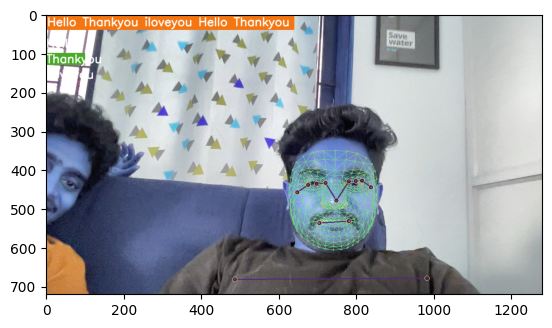

In [77]:
plt.imshow(image)

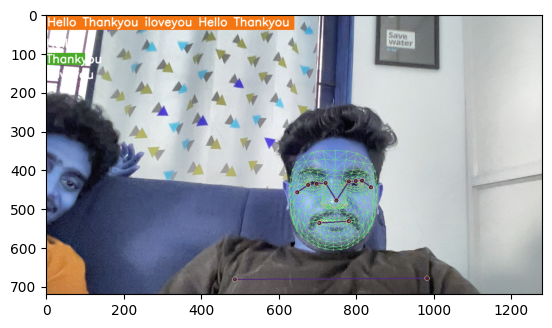

In [78]:
plt.imshow(prob_viz(res,actions,image,colors))